In [2]:
import pandas as pd
import modules.rEYEkerAnalysis as rEYEker
import modules.semanticClassifier as semCls
import modules.clickSettings as clk

In [3]:
df = pd.read_excel('Book4.xlsx', skiprows=[1])
#df.head(10)

# Gender Stats

In [3]:
pd07dict = {1:"male", 2:"female", 3:"other", -9:"not answered"}
df['PD07'].value_counts().rename(index=pd07dict)

male      84
female    22
other      1
Name: PD07, dtype: int64

# Utility

In [4]:
def to_click_vector(click_str):
    click_data = []
    click_str = click_str.strip();
    coordinates_str = click_str.split(" ")
    coordinates = []
    for coordinate_str in coordinates_str:
        coordinate = coordinate_str.split("-")
        coordinate = (int(coordinate[0]), int(coordinate[1]))
        coordinates.append(coordinate)
    click_data.append(coordinates)
    
    return click_data

click_setting = clk.ClickSettings()
#adjust to
click_setting.minimal_width = 200
click_setting.minimal_height = 10
click_setting.grad_radius = 20

def generate_heatmaps(image, clks, df, indexes, column_name):
    heat_maps = []
    for i in indexes:
        click_str = df.at[i, column_name]
        click_vector = to_click_vector(click_str)
        data = click_vector
        heat_map = rEYEker.draw_shape_heat_map(image, 0, len(data[0]), data[0], clks, should_copy=True)
        heat_maps.append(heat_map)
    return heat_maps;

def display_all(heatmaps):
    for heatmap in heatmaps:
        rEYEker.display(heatmap, normal_size = True, axis_on=False)

def save_all(heatmaps, df, path):
    n = 0
    for i in df.index:
        rEYEker.save(heatmaps[n], path + "_" + str(df.at[i,'CASE']) + ".PNG")
        n += 1


# Common Variables

In [5]:
# analysis population samples
participant = 'Participant'

# approaches
tr = 'TR' # top recursive
br = 'BR' # bottom down recursive
ti = 'TI' # top down iterative
bi = 'BI' # bottom up iterative
#algorithms
bubble = 'bubblesort'
factorial = 'factorial'
fibonacci = 'fibonacci'
rstring = 'rstring'
#image paths
bsort = "images\\{}\\{}_BubbleSort.PNG"
fct = "images\\{}\\{}_Factorial.PNG"
fib = "images\\{}\\{}_Fibonacci.PNG"
rs = "images\\{}\\{}_ReverseString.PNG"


# Female and Male Samples

In [6]:
#df_female = df.loc[df['PD07'] == 2.0]
#df_male = df.loc[df['PD07'] == 1.0]

# TR18_01 ClickVector TopDownRecursive bubble sort

In [7]:
col = tr + '18_01' 
df_tr_bsort = df.loc[df[col].notna()]

image = rEYEker.load_image(bsort.format(tr,tr))

heatmaps = generate_heatmaps(image, click_setting, df_tr_bsort, df_tr_bsort.index, col)


In [8]:
%%capture
save_all(heatmaps, df_tr_bsort, "images\\heatmaps\\bubblesort\\TR\\bubbleSort_{}_{}".format(tr,participant))

# TR19_01 ClickVector TopDownRecursive factorial

In [9]:
col = tr + '19_01'
df_tr_fct = df.loc[df[col].notna()]

image = rEYEker.load_image(fct.format(tr,tr))

heatmaps = generate_heatmaps(image, click_setting, df_tr_fct, df_tr_fct.index, col)


In [10]:
%%capture
save_all(heatmaps, df_tr_fct, "images\\heatmaps\\factorial\\TR\\factorial_{}_{}".format(tr,participant))

# TR20_01 ClickVector TopDownRecursive fibonacci

In [11]:
col = tr + '20_01'
df_tr_fib = df.loc[df[col].notna()]

image = rEYEker.load_image(fib.format(tr,tr))

heatmaps = generate_heatmaps(image, click_setting, df_tr_fib, df_tr_fib.index, col)


In [12]:
%%capture
save_all(heatmaps, df_tr_fib, "images\\heatmaps\\fibonacci\\TR\\fibonacci_{}_{}".format(tr,participant))

# TR21_01 ClickVector TopDownRecursive reverse string

In [10]:
col = tr + '21_01'
df_tr_rs_fem = df.loc[df[col].notna()]

image = rEYEker.load_image(rs.format(tr,tr))

heatmaps = generate_heatmaps(image, click_setting, df_tr_rs_fem, df_tr_rs_fem.index, col)
#display_all(heatmaps)


ValueError: invalid literal for int() with base 10: ''

In [ ]:
%%capture
save_all(heatmaps, df_tr_rs, "images\\heatmaps\\reversestring\\TR\\reverse_string_{}_{}".format(tr,participant))

In [ ]:
average_heatmaps = []

# iterate over all the datasets
for idx, stimulus_dataset in enumerate(visual_stimulus_data_array):
    image = images[idx]
    visual_measurements = visual_stimulus_data_array[idx]
    time_measurements = None
    if len(timestamps_data_array) > idx:
        time_measurements = timestamps_data_array[idx]
    im = rEYEker.draw_average_shape_heat_map_rel(image, visual_measurements, click_setting, 1.0, .0, time_measurements, should_copy=True)
    average_heatmaps.append(im)

# TI18_01 ClickVector TopDownIterative bubble sort

In [6]:
col = ti + '18_01'
df_ti_bsort = df.loc[df[col].notna()]

image = rEYEker.load_image(bsort.format(ti,ti))

heatmaps = generate_heatmaps(image, click_setting, df_ti_bsort, df_ti_bsort.index, col)


In [7]:
%%capture
save_all(heatmaps, df_ti_bsort, "images\\heatmaps\\bubblesort\\TI\\bubbleSort_{}_{}".format(ti,participant))

# TI19_01 ClickVector TopDownIterative factorial

In [8]:
col = ti + '19_01'
df_ti_fct = df.loc[df[col].notna()]

image = rEYEker.load_image(fct.format(ti,ti))

heatmaps = generate_heatmaps(image, click_setting, df_ti_fct, df_ti_fct.index, col)


In [9]:
%%capture
save_all(heatmaps, df_ti_fct, "images\\heatmaps\\factorial\\TI\\factorial_{}_{}".format(ti,participant))

# TI20_01 ClickVector TopDownIterative fibonacci

In [10]:
col = ti + '20_01'
df_ti_fib = df.loc[df[col].notna()]

image = rEYEker.load_image(fib.format(ti,ti))

heatmaps = generate_heatmaps(image, click_setting, df_ti_fib, df_ti_fib.index, col)


In [11]:
%%capture
save_all(heatmaps, df_ti_fib, "images\\heatmaps\\fibonacci\\TI\\fibonacci_{}_{}".format(ti,participant))

# TI21_01 ClickVector TopDownIterative reverse string

In [12]:
col = ti + '21_01'
df_ti_rs = df.loc[df[col].notna()]

image = rEYEker.load_image(rs.format(ti,ti))

heatmaps = generate_heatmaps(image, click_setting, df_ti_rs, df_ti_rs.index, col)


In [13]:
%%capture
save_all(heatmaps, df_ti_rs, "images\\heatmaps\\reversestring\\TI\\reverse_string_{}_{}".format(ti,participant))

# BR18_01 ClickVector BottomUpRecursive bubble sort

In [14]:
col = br + '18_01'
df_br_bsort = df.loc[df[col].notna()]


image = rEYEker.load_image(bsort.format(br,br))

heatmaps = generate_heatmaps(image, click_setting, df_br_bsort, df_br_bsort.index, col)


In [15]:
%%capture
save_all(heatmaps, df_br_bsort, "images\\heatmaps\\bubblesort\\BR\\bubbleSort_{}_{}".format(br,participant))

# BR19_01 ClickVector BottomUpRecursive factorial

In [16]:
col = br + '19_01'
df_br_fct = df.loc[df[col].notna()]

image = rEYEker.load_image(fct.format(br,br))

heatmaps = generate_heatmaps(image, click_setting, df_br_fct, df_br_fct.index, col)


In [17]:
%%capture
save_all(heatmaps, df_br_fct, "images\\heatmaps\\factorial\\BR\\factorial_{}_{}".format(br,participant))

# BR20_01 ClickVector BottomUpRecursive fibonacci

In [18]:
col = br + '20_01'
df_br_fib_fem = df.loc[df[col].notna()]


image = rEYEker.load_image(fib.format(br,br))

heatmaps = generate_heatmaps(image, click_setting, df_br_fib_fem, df_br_fib_fem.index, col)


In [19]:
%%capture
save_all(heatmaps, df_br_fib_fem, "images\\heatmaps\\fibonacci\\BR\\fibonacci_{}_{}".format(br,participant))

# BR21_01 ClickVector BottomUpRecursive reverse string

In [20]:
col = br + '21_01'
df_br_rs_fem = df.loc[df[col].notna()]

image = rEYEker.load_image(rs.format(br,br))

heatmaps = generate_heatmaps(image, click_setting, df_br_rs_fem, df_br_rs_fem.index, col)


In [22]:
%%capture
save_all(heatmaps, df_br_rs_fem, "mages\\heatmaps\\reversestring\\BR\\reverse_string_{}_{}".format(br,participant))

# BI18_01 ClickVector BottomUpIterative bubble sort

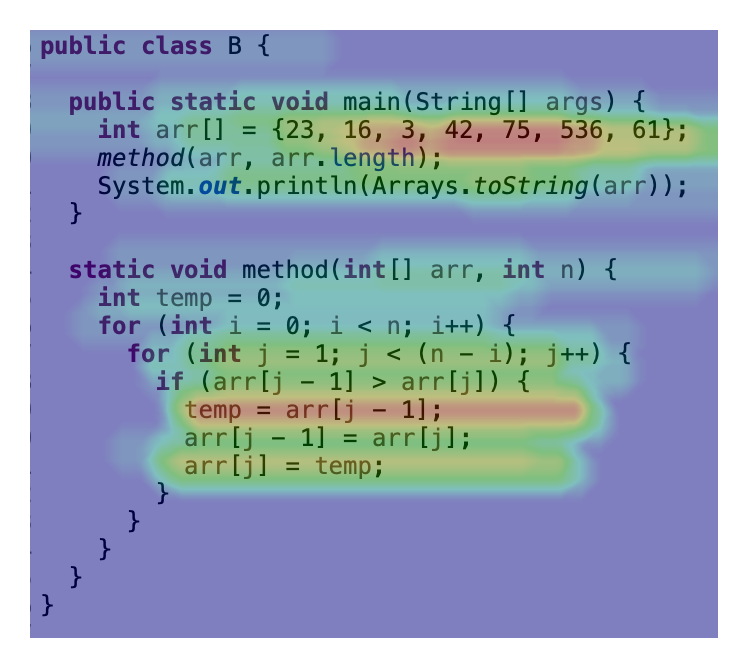

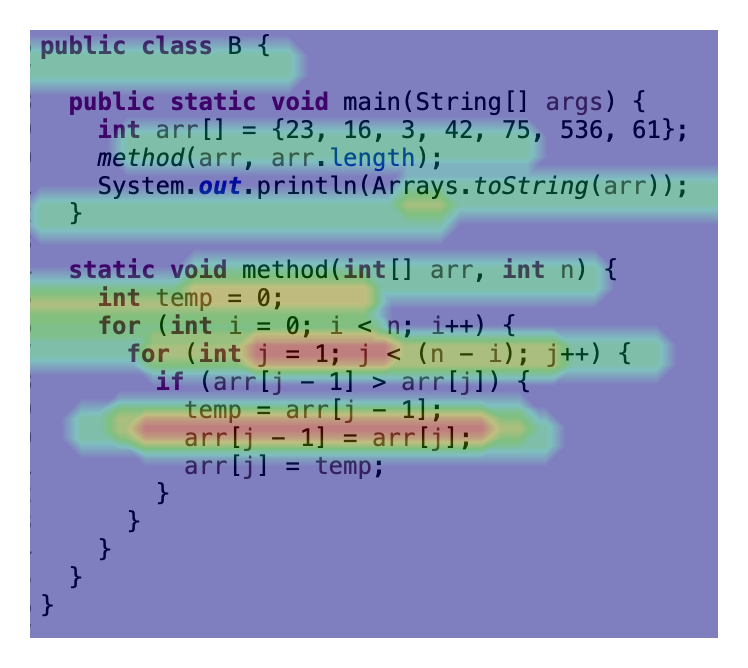

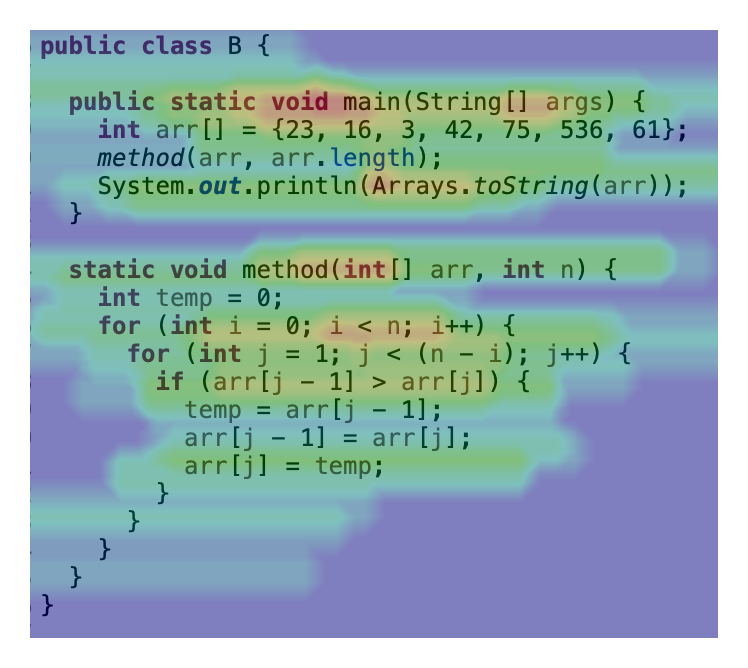

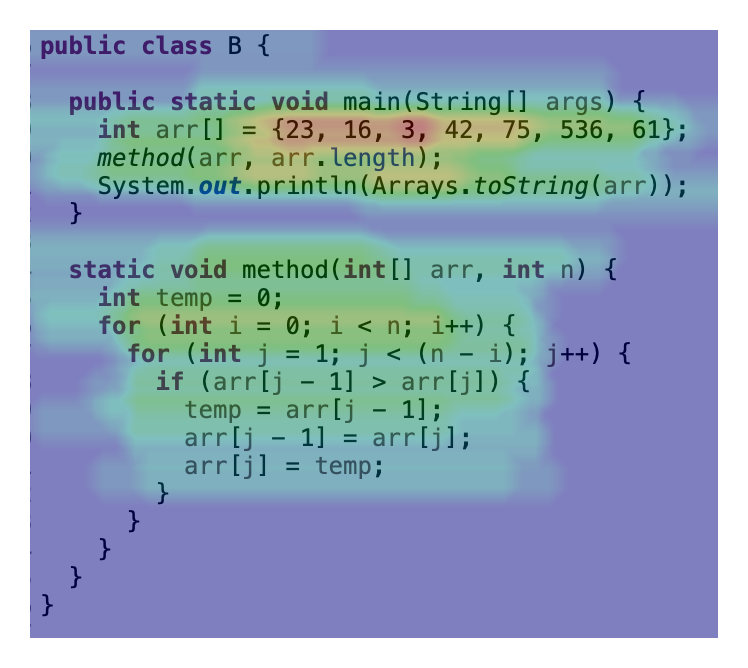

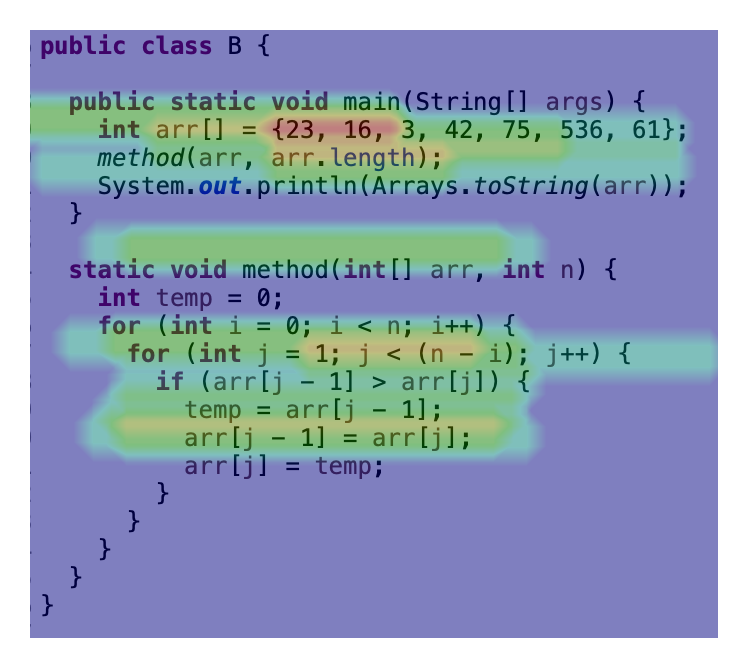

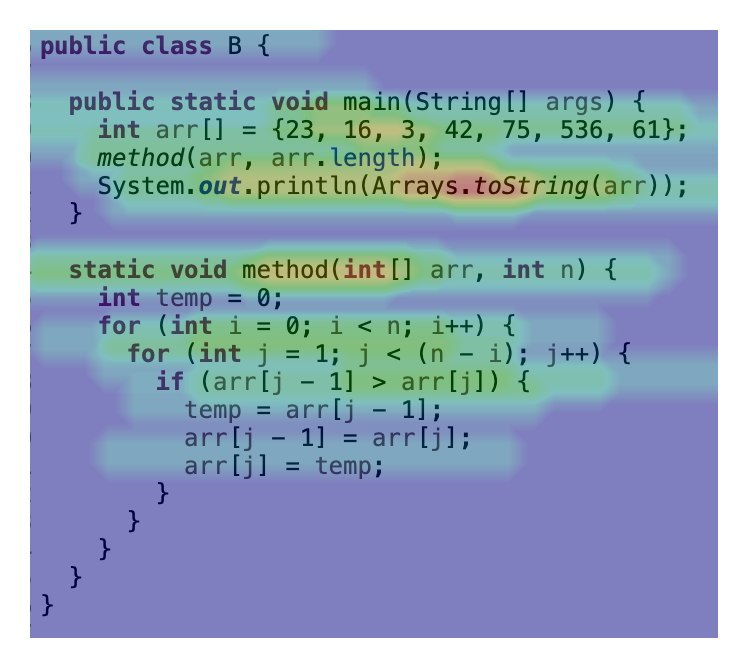

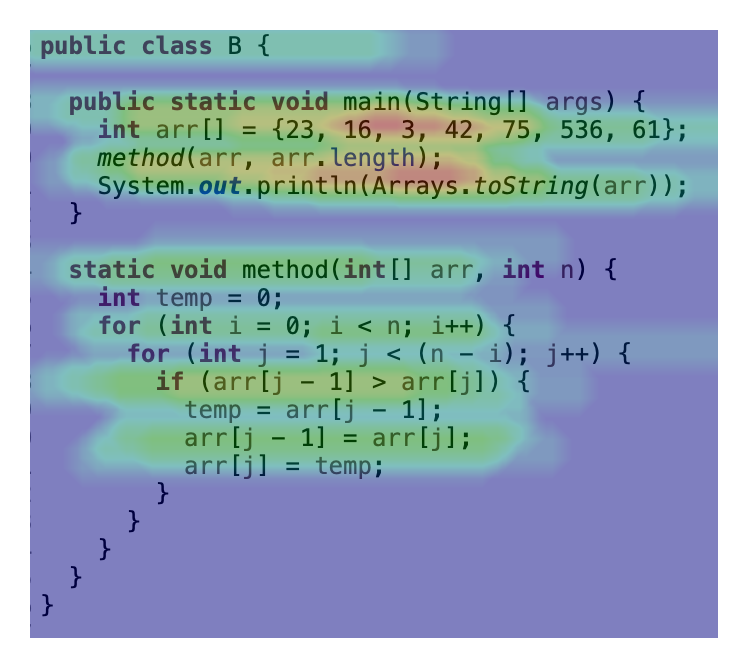

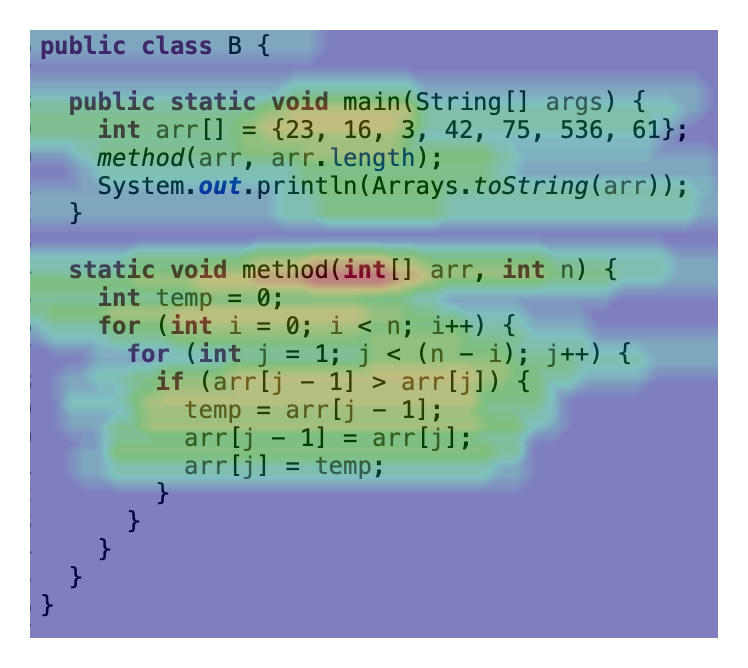

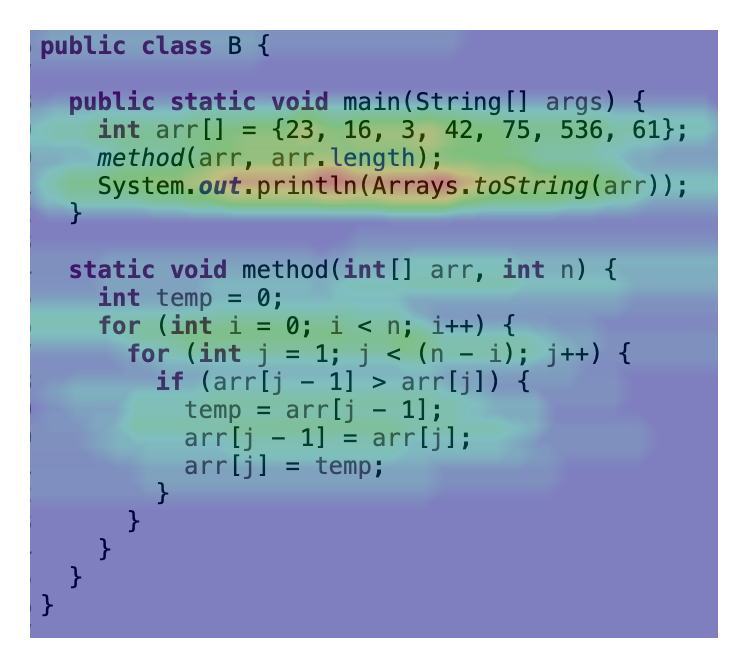

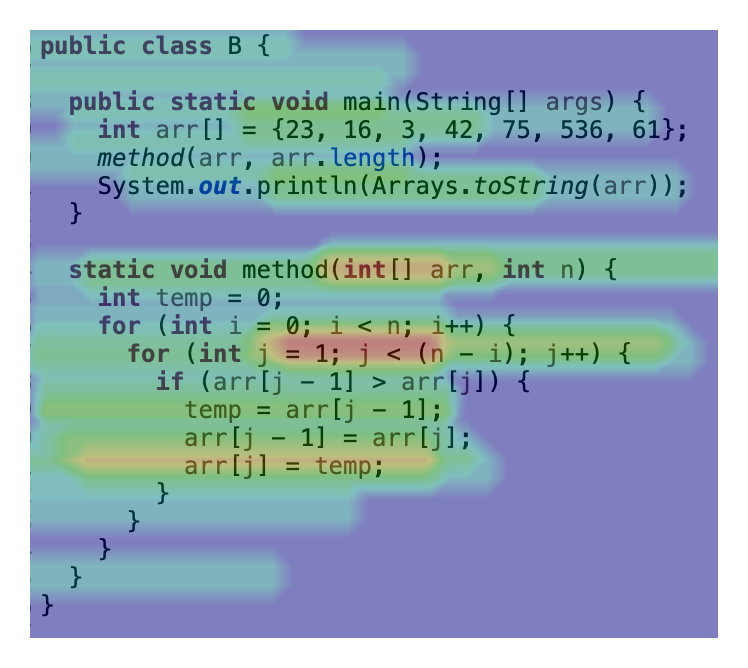

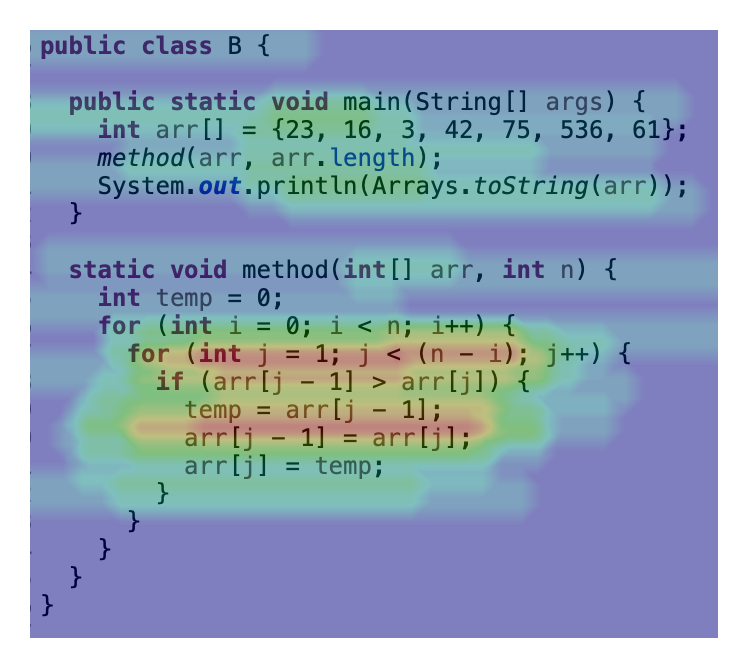

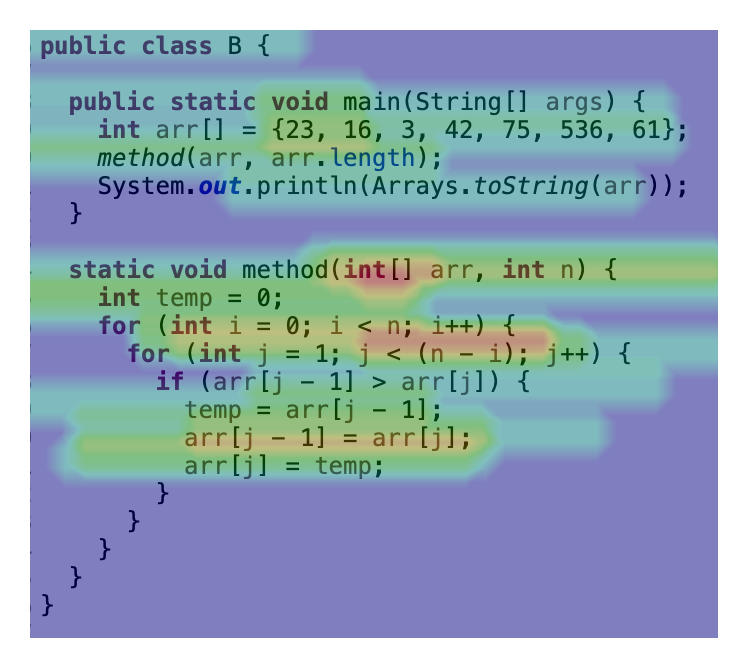

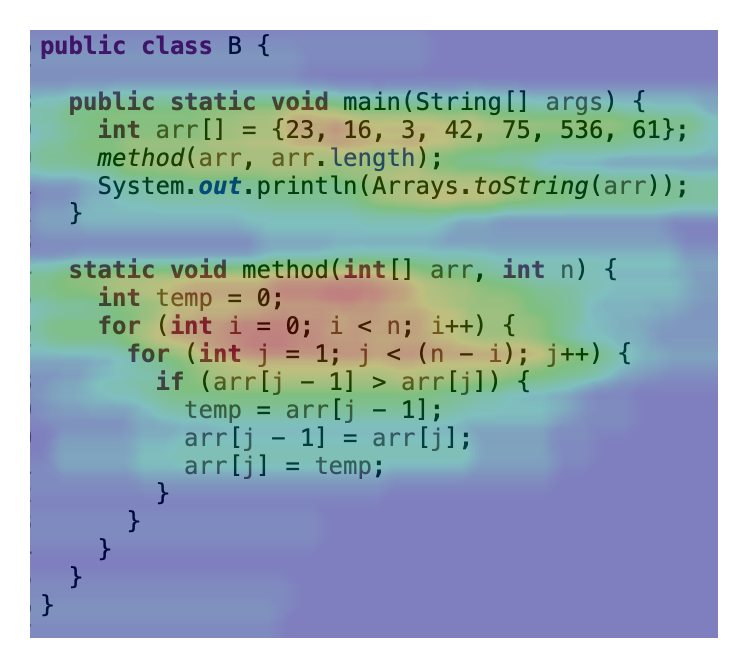

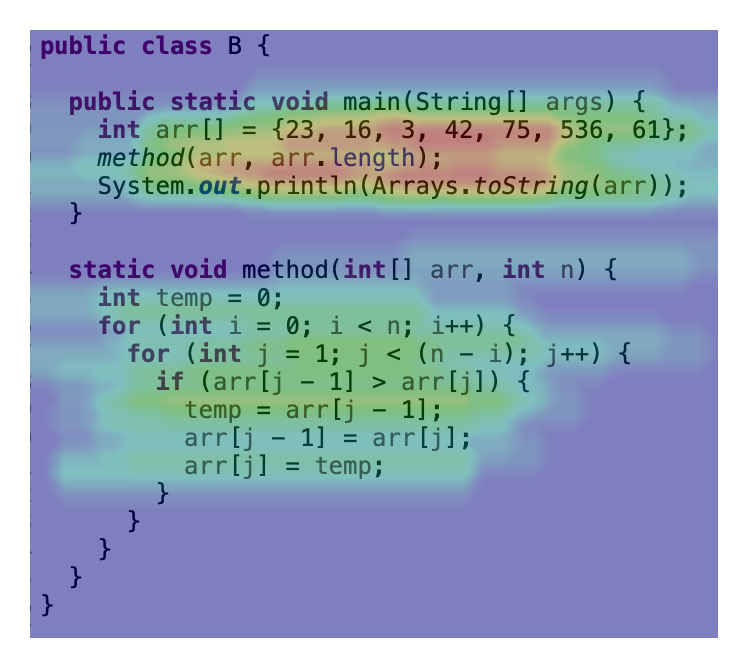

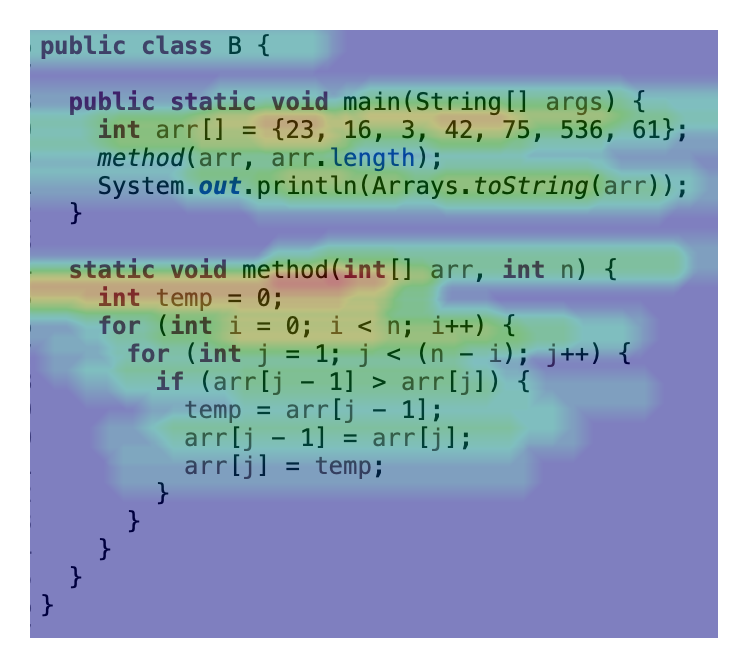

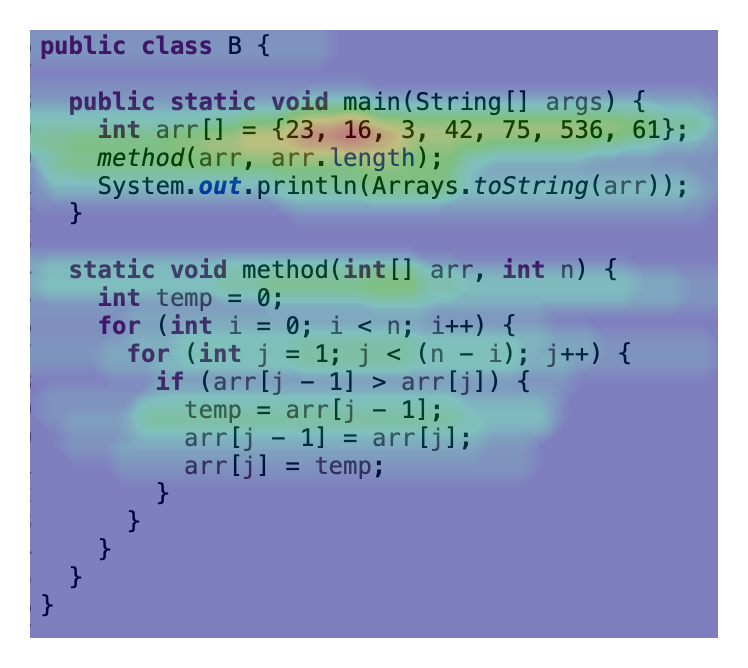

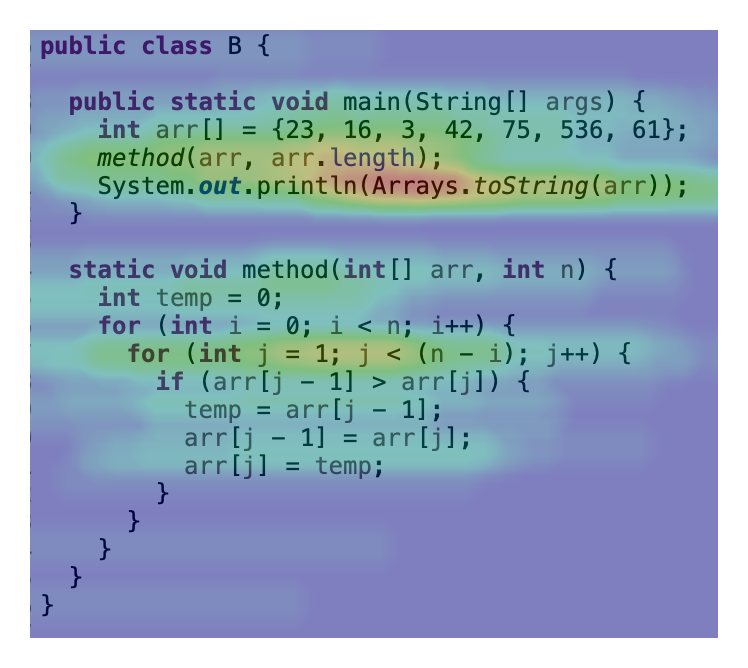

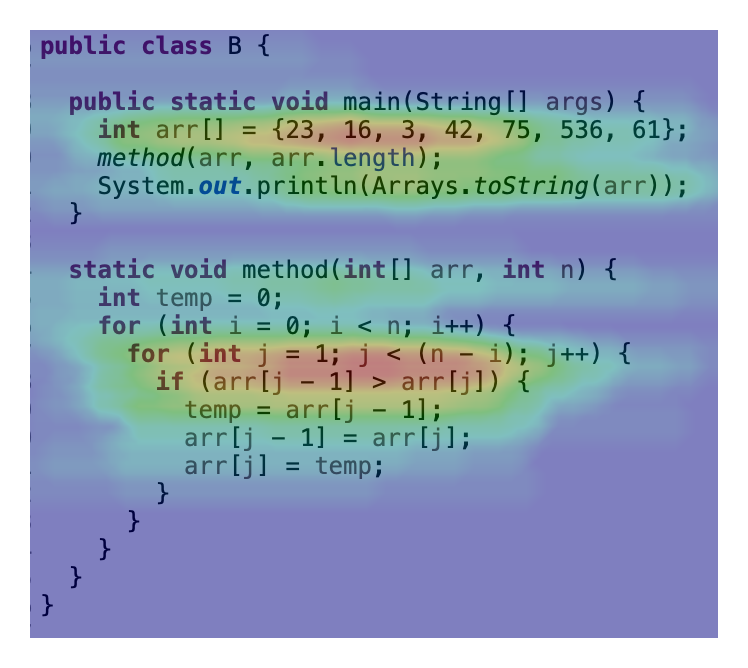

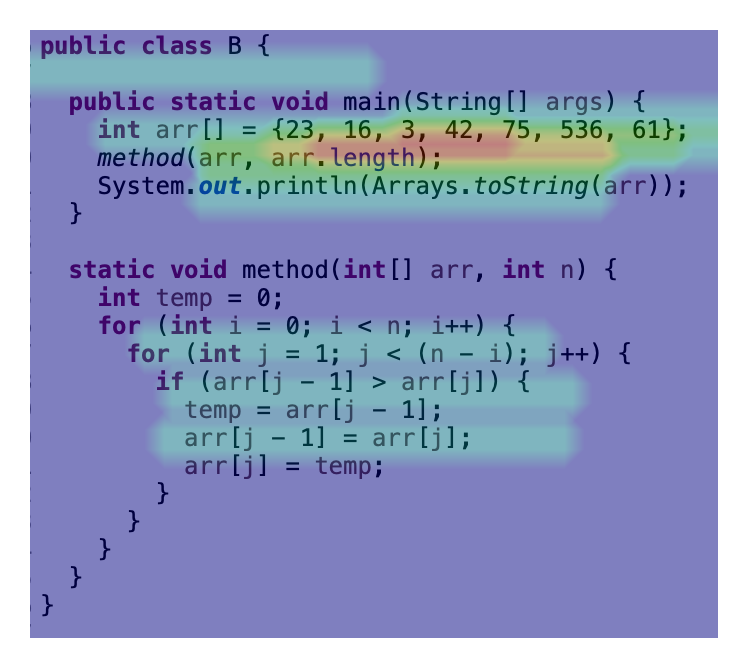

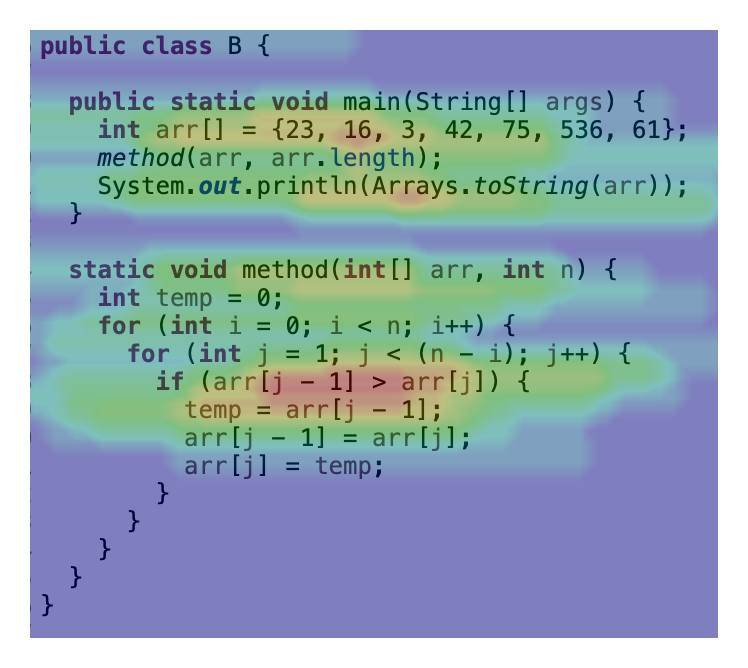

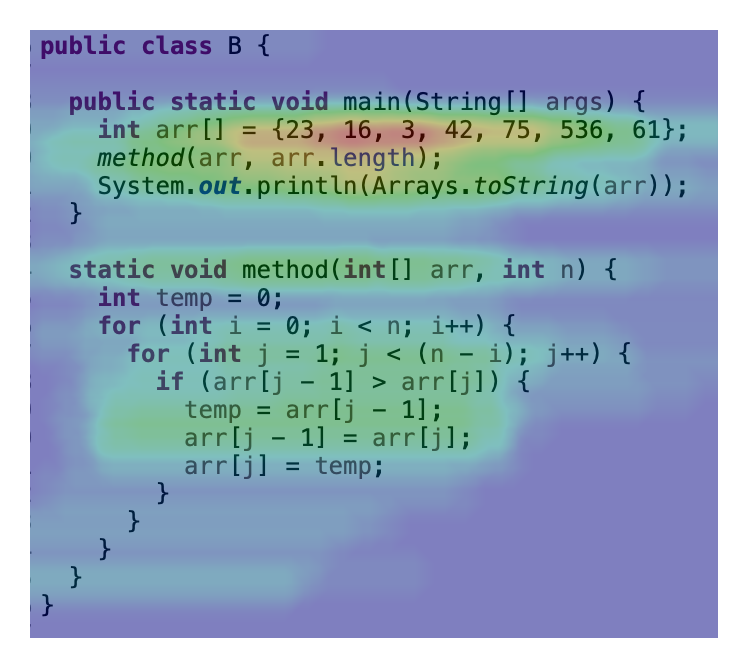

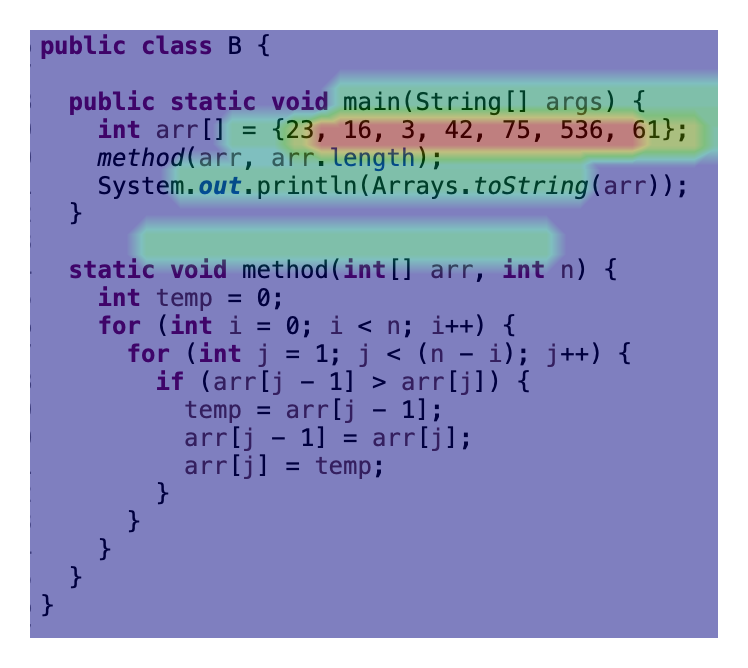

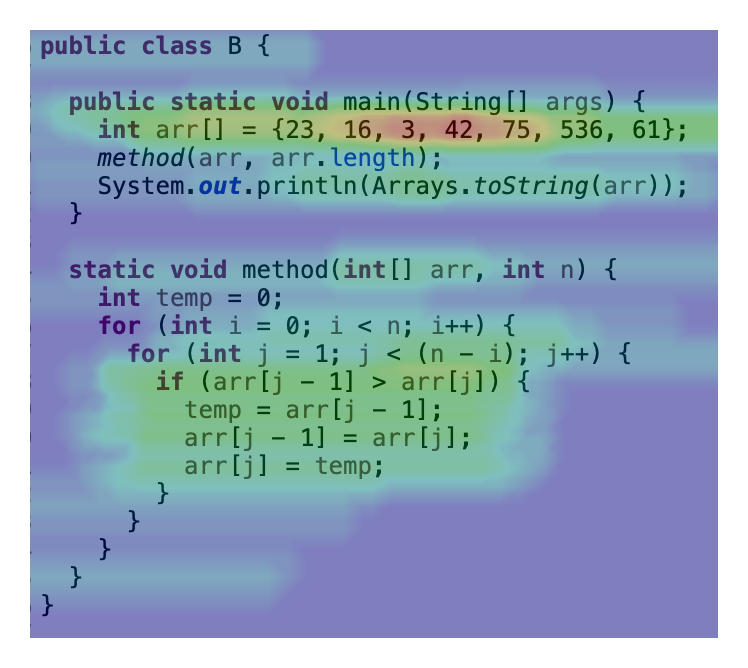

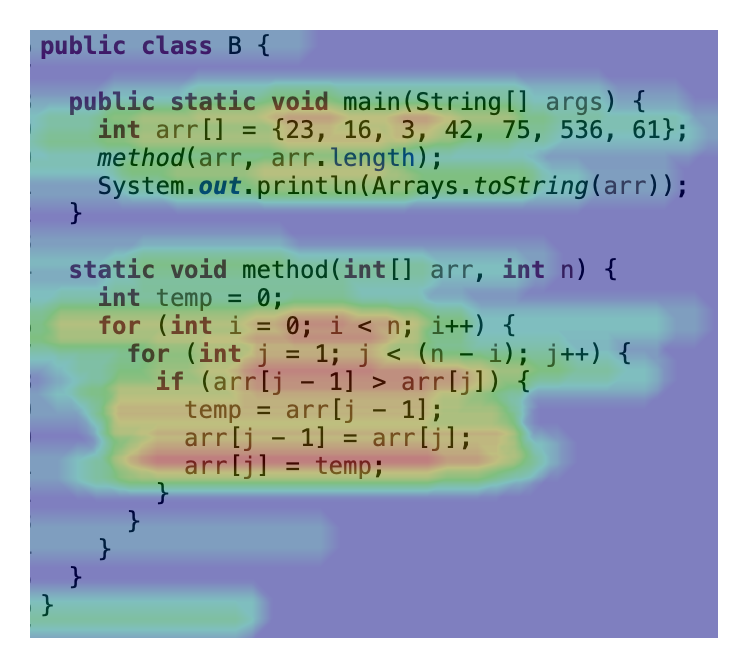

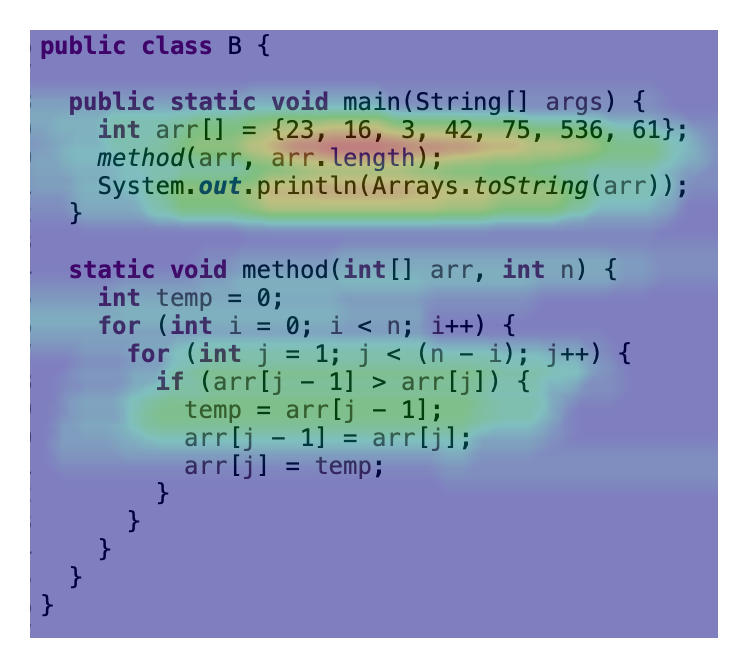

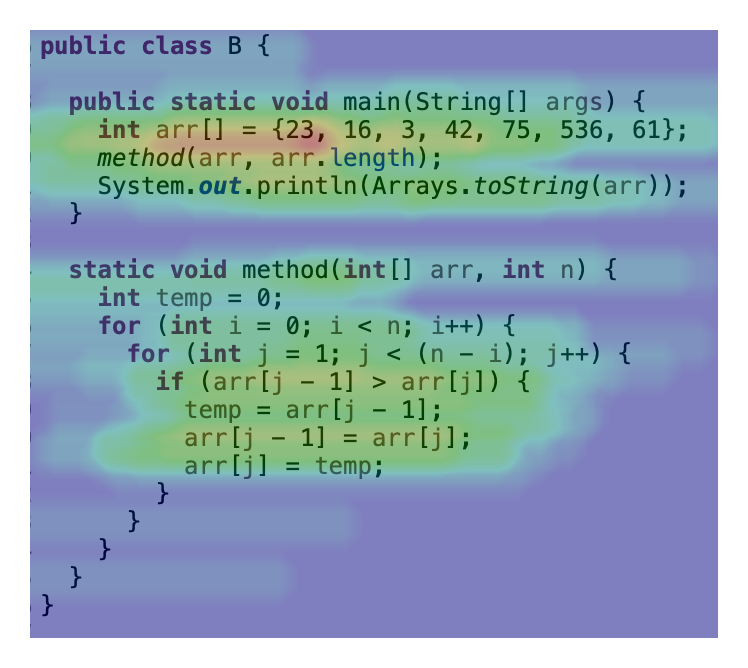

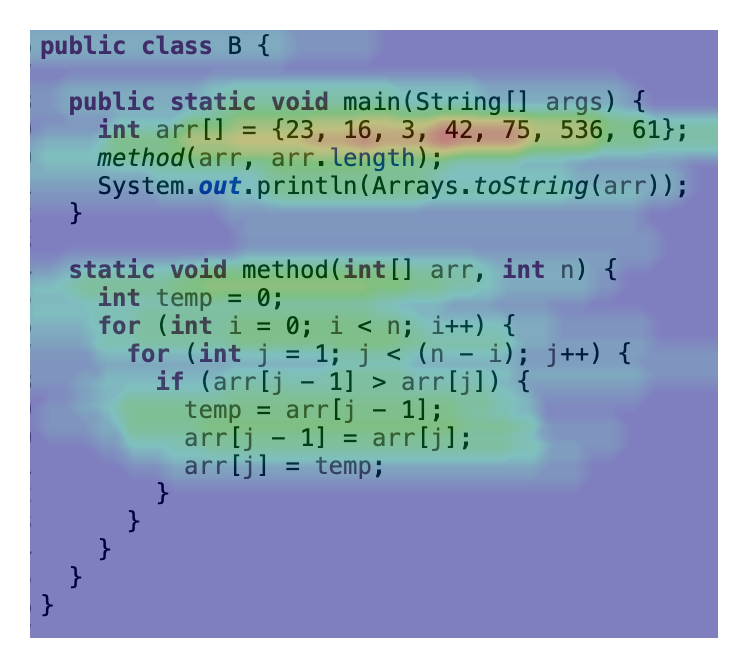

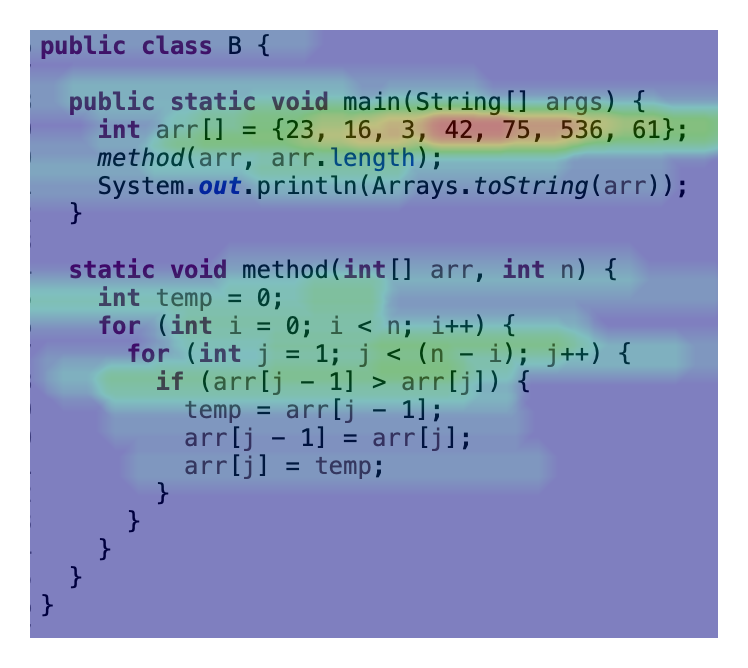

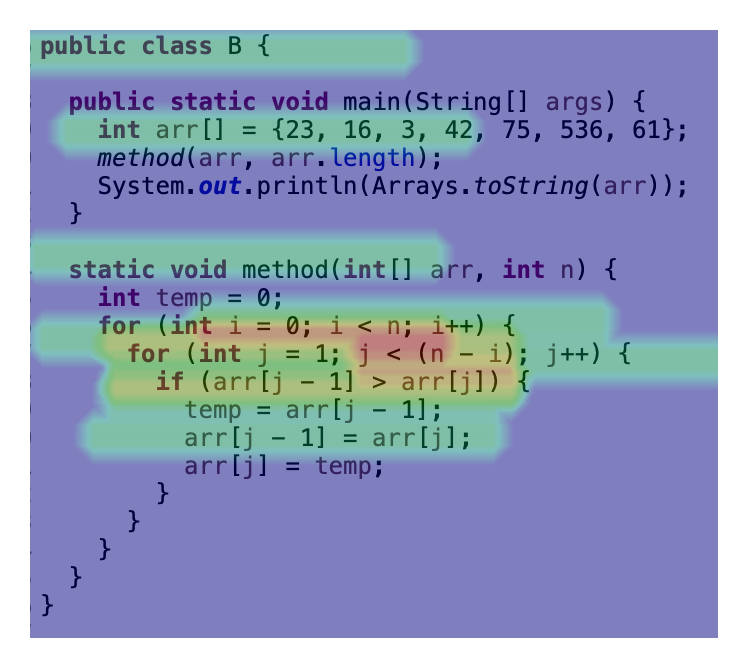

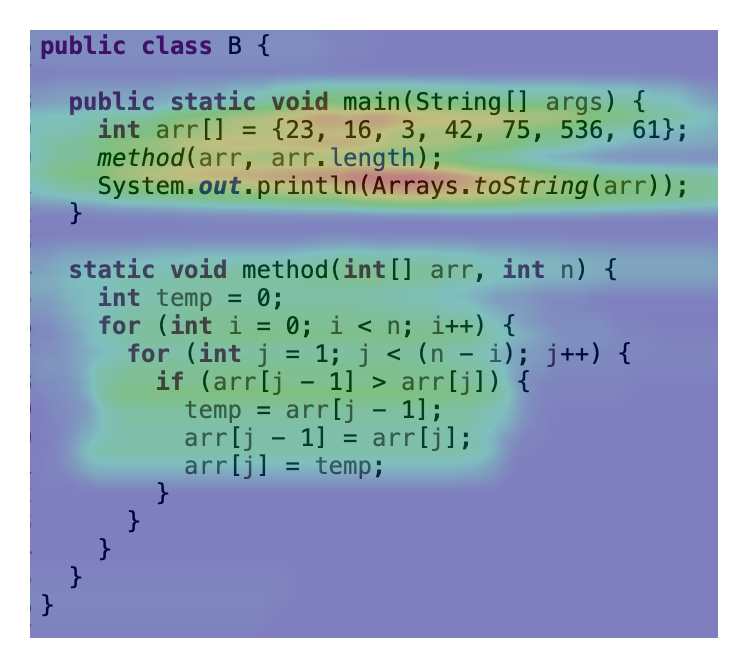

In [6]:
col = bi + '18_01'
df_bi_bsort_fem = df.loc[df[col].notna()]

image = rEYEker.load_image(bsort.format(bi,bi))

heatmaps = generate_heatmaps(image, click_setting, df_bi_bsort_fem, df_bi_bsort_fem.index, col)
display_all(heatmaps)

In [7]:
%%capture
save_all(heatmaps, df_bi_bsort_fem, "images\\heatmaps\\bubblesort\\BI\\bubbleSort_{}_{}".format(bi,participant))

# BI19_01 ClickVector BottomUpIterative factorial

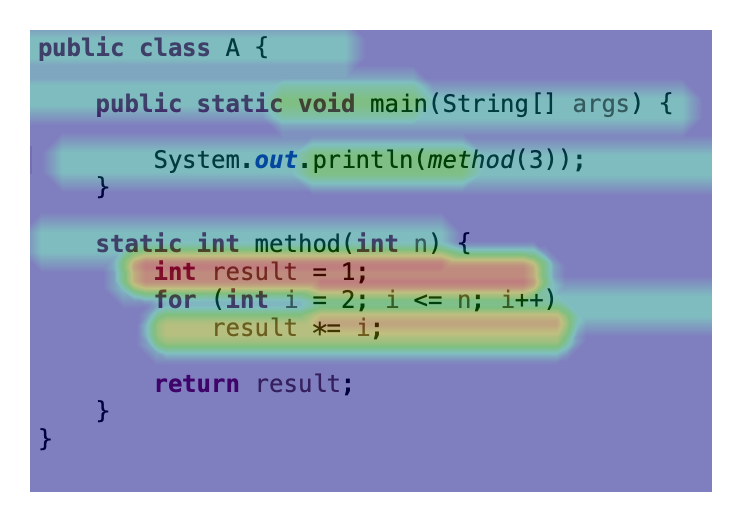

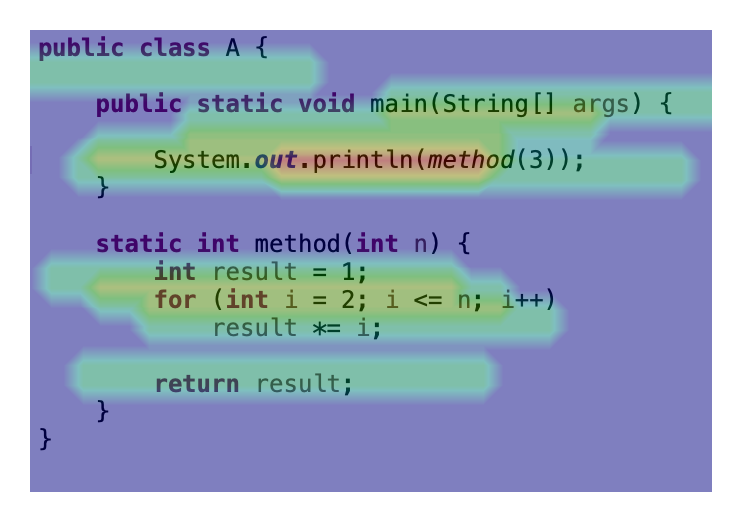

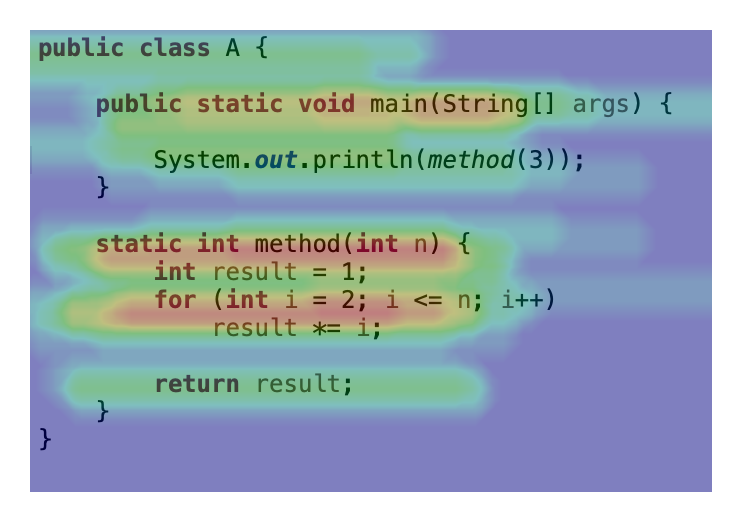

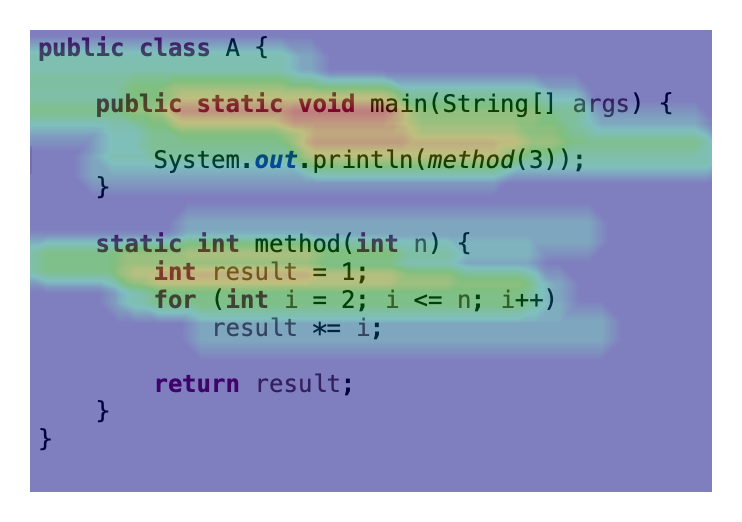

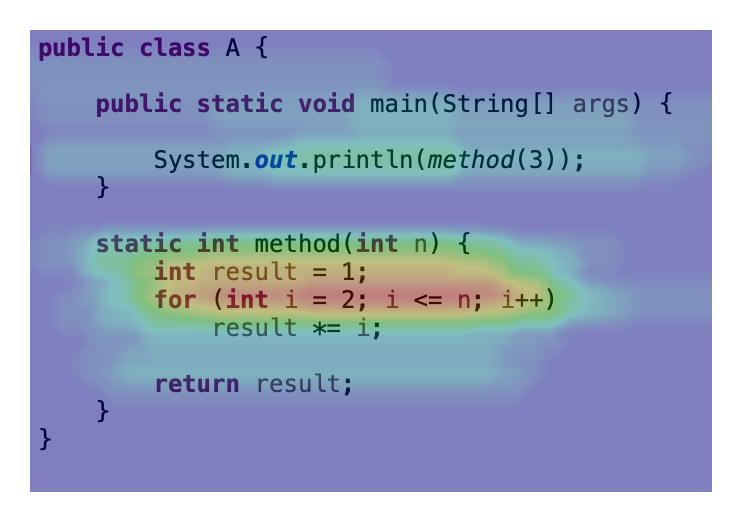

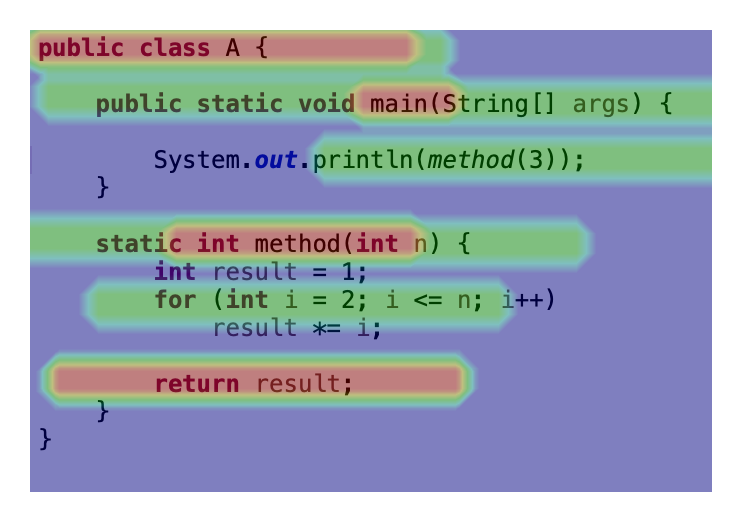

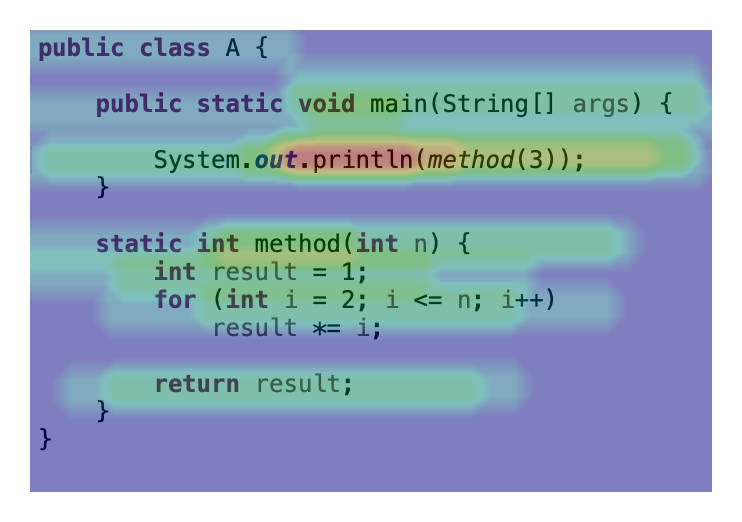

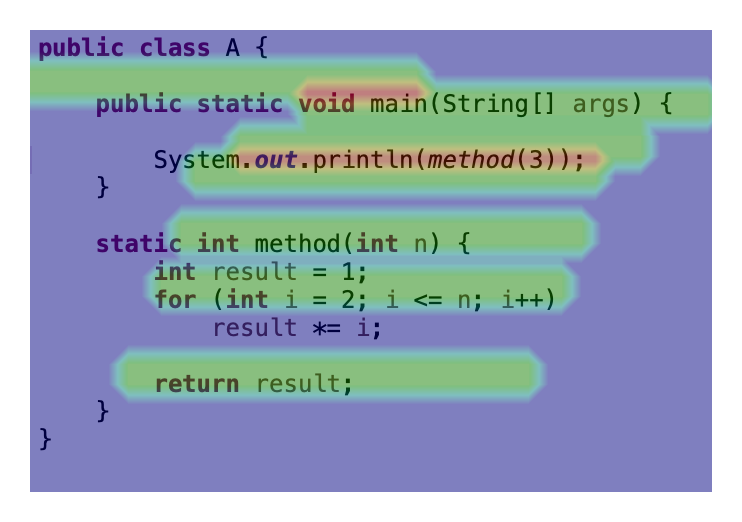

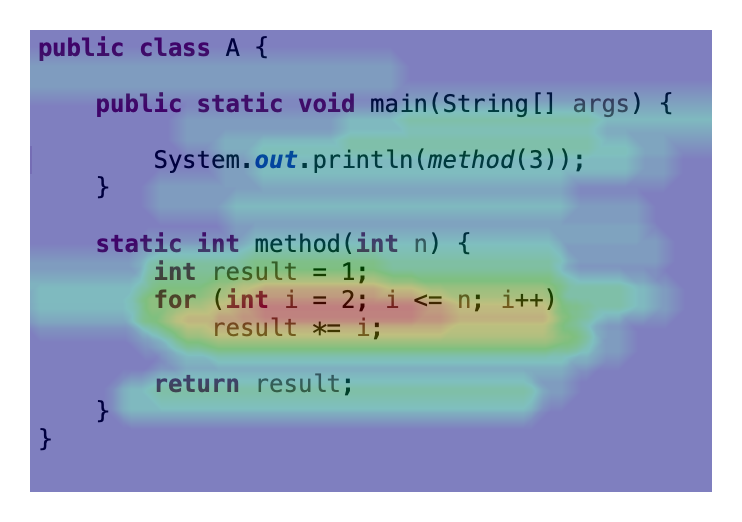

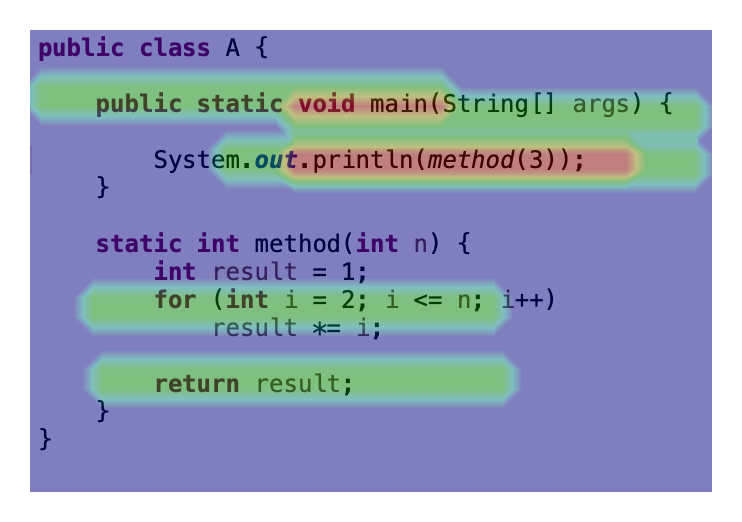

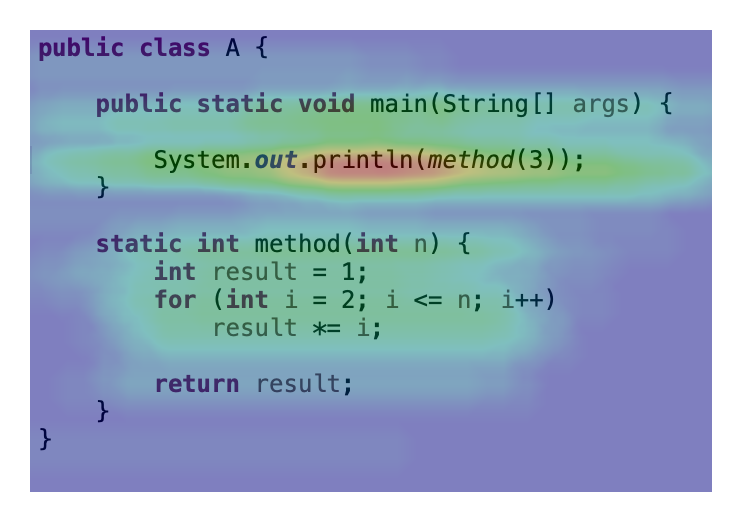

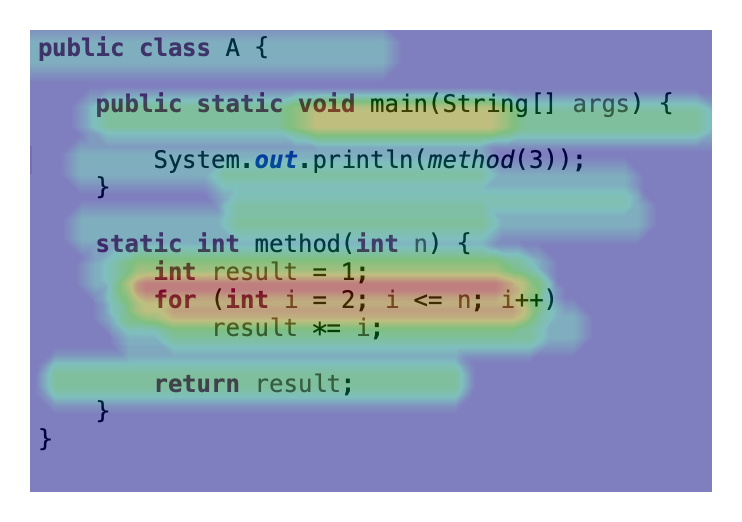

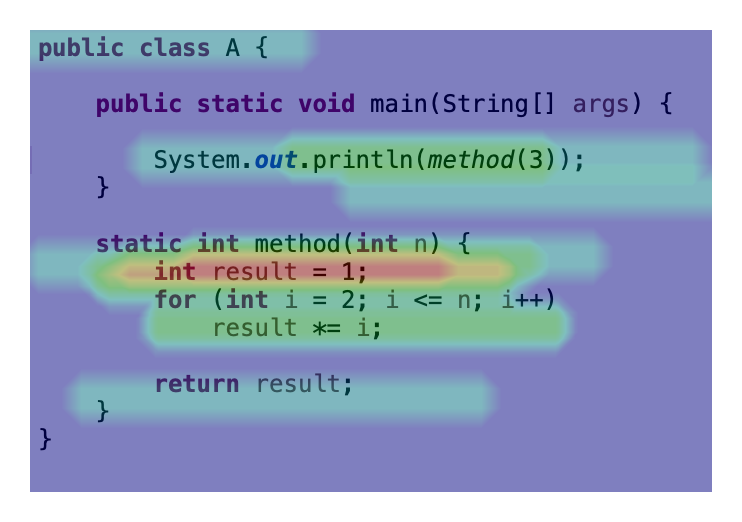

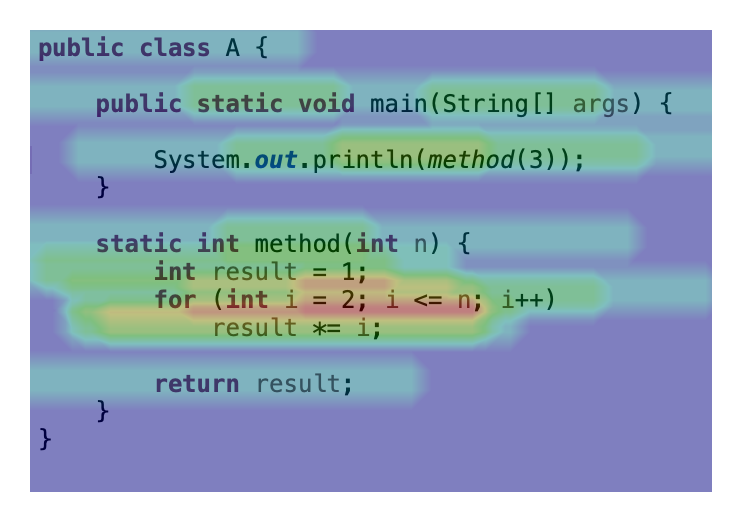

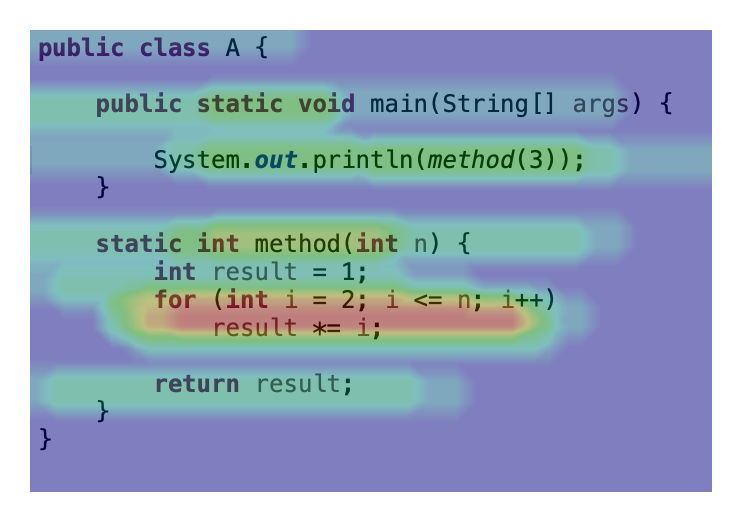

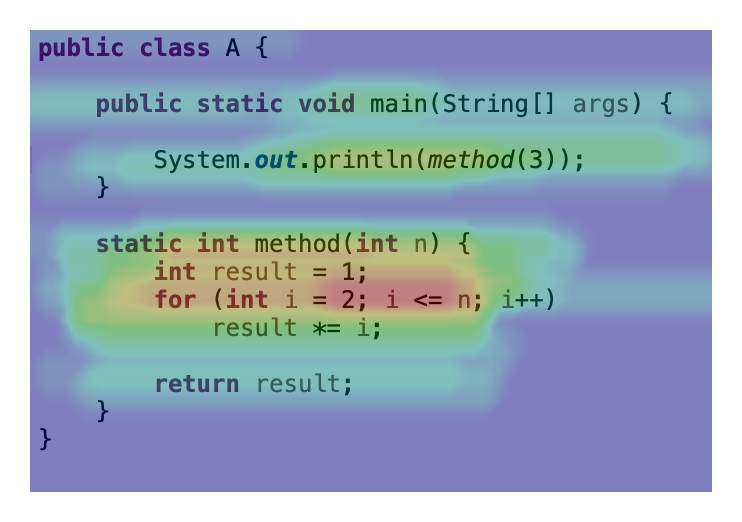

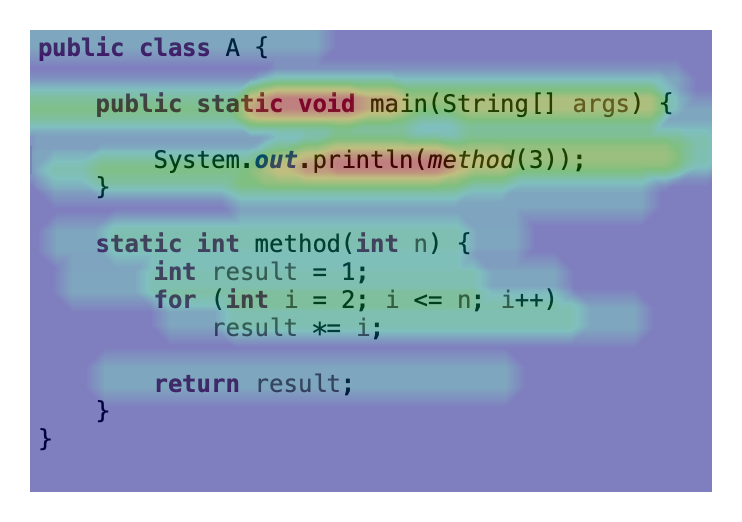

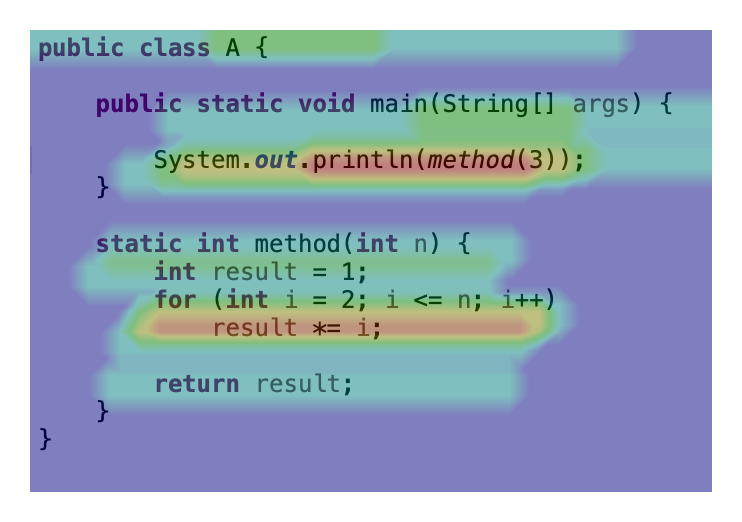

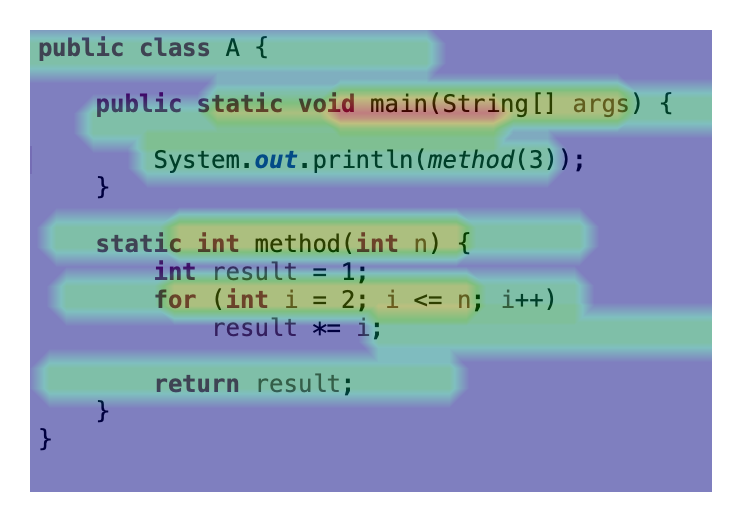

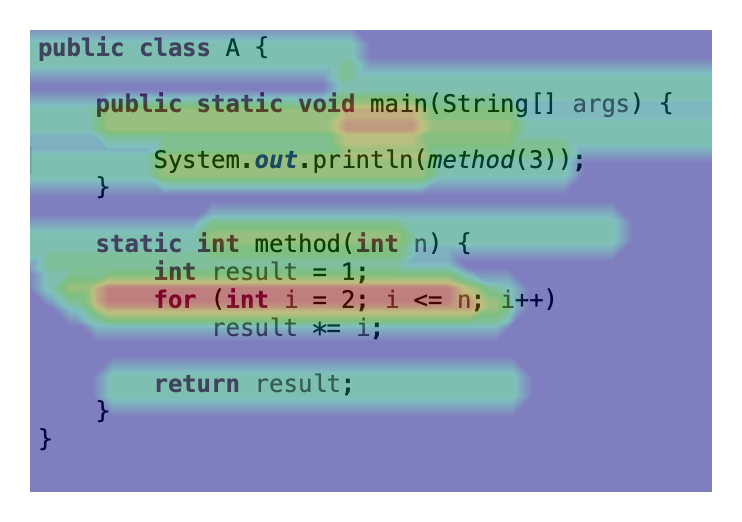

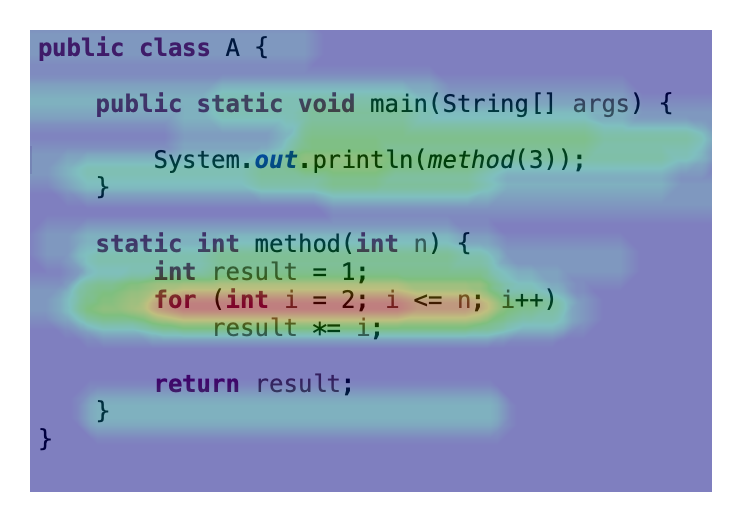

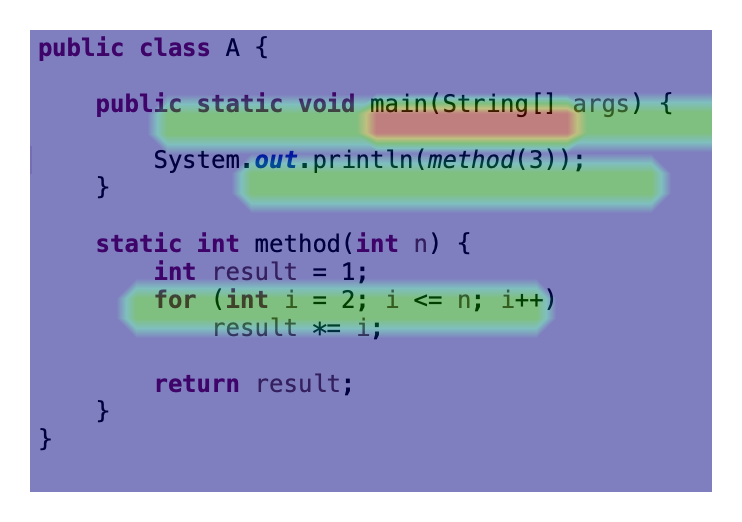

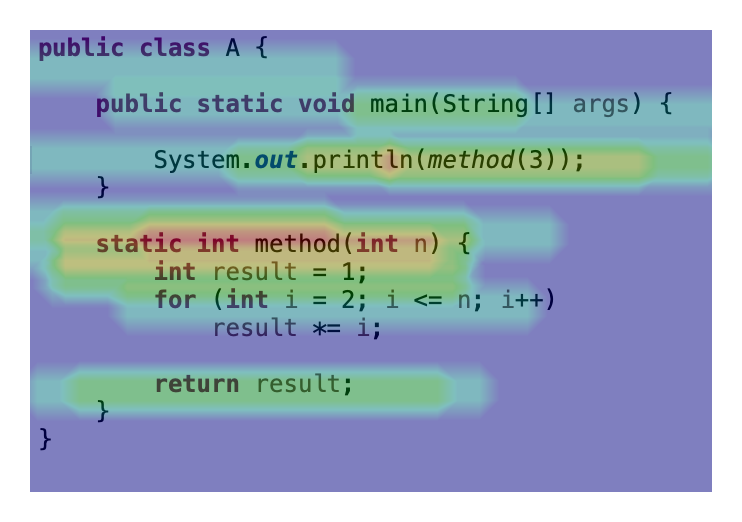

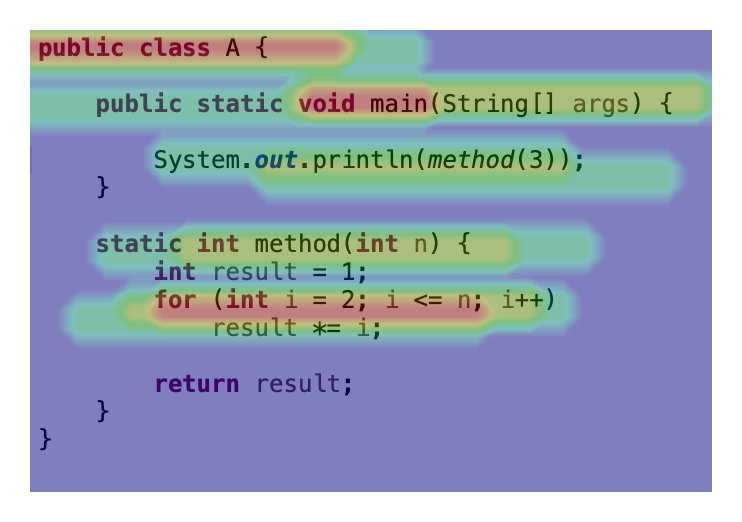

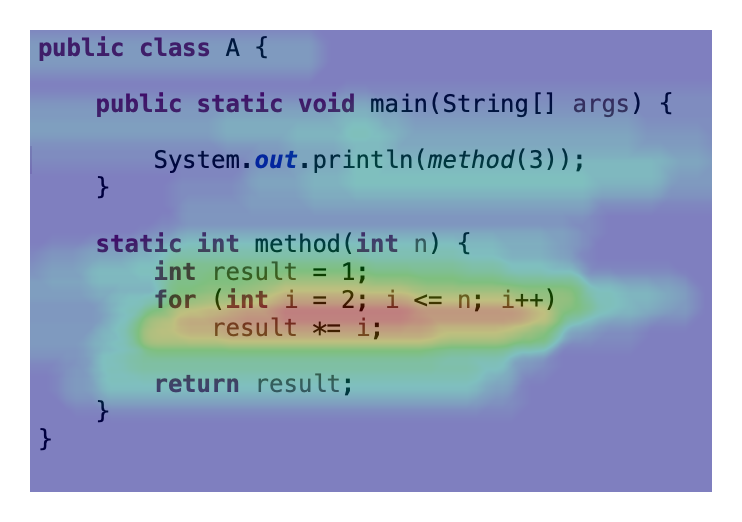

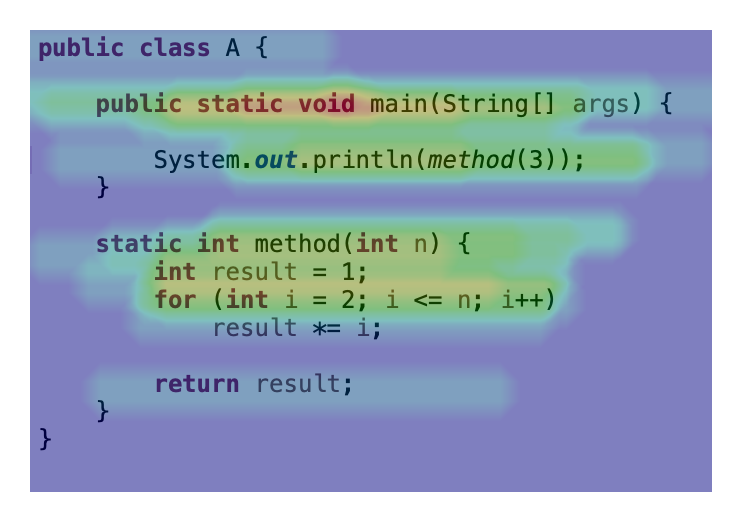

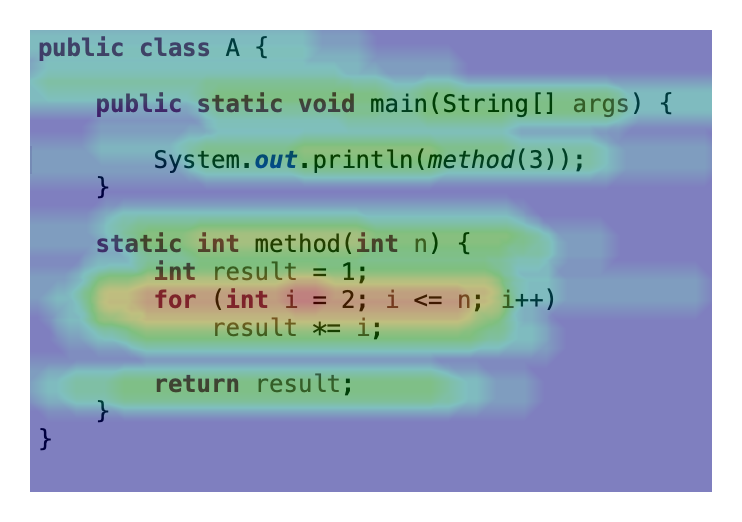

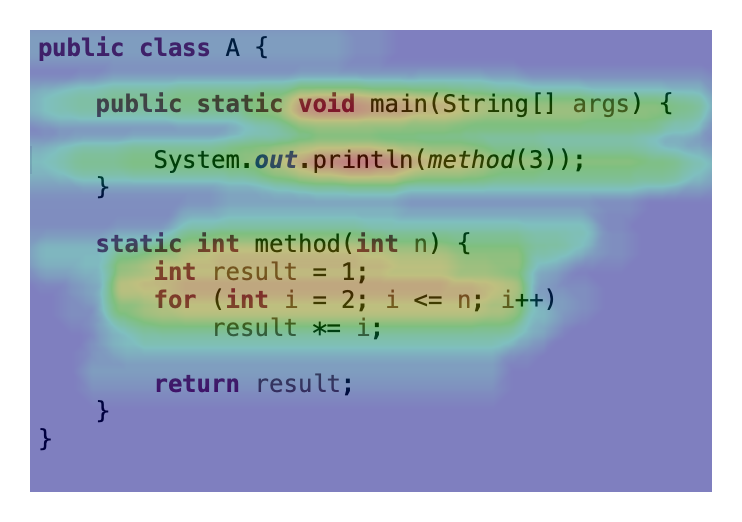

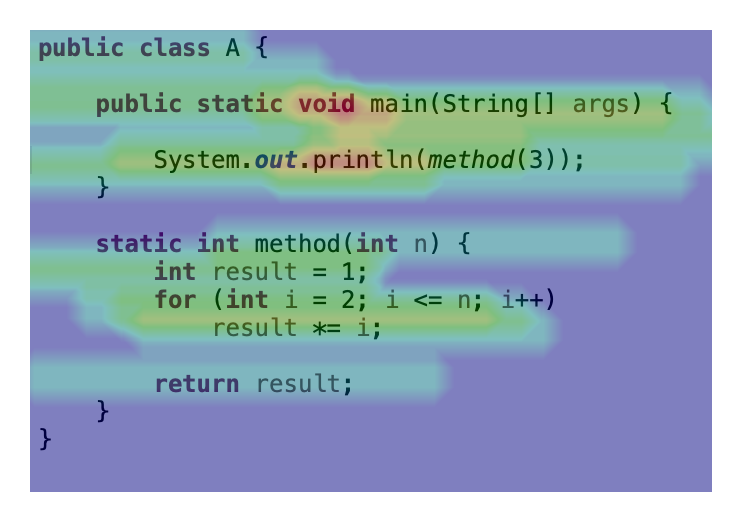

In [8]:
col = bi + '19_01'
df_bi_fct_fem = df.loc[df[col].notna()]

image = rEYEker.load_image(fct.format(bi,bi))

heatmaps = generate_heatmaps(image, click_setting, df_bi_fct_fem, df_bi_fct_fem.index, col)
display_all(heatmaps)

In [9]:
%%capture
save_all(heatmaps, df_bi_fct_fem, "images\\heatmaps\\factorial\\BI\\factorial_{}_{}".format(bi,participant))

# BI20_01 ClickVector BottomUpIterative fibonacci

In [10]:
col = bi + '20_01'
df_bi_fib_fem = df.loc[df[col].notna()]
image = rEYEker.load_image(fib.format(bi,bi))

heatmaps = generate_heatmaps(image, click_setting, df_bi_fib_fem, df_bi_fib_fem.index, col)


In [11]:
%%capture
save_all(heatmaps, df_bi_fib_fem, "images\\heatmaps\\fibonacci\\BI\\fibonacci_{}_{}".format(bi,participant))

# BI21_01 ClickVector TopDownIterative reverse string

In [12]:
col = bi + '21_01'
df_bi_rs_fem = df.loc[df[col].notna()]

image = rEYEker.load_image(rs.format(bi,bi))

heatmaps = generate_heatmaps(image, click_setting, df_bi_rs_fem, df_bi_rs_fem.index, col)


In [13]:
%%capture
save_all(heatmaps, df_bi_rs_fem, "images\\heatmaps\\reversestring\\BI\\reverse_string_{}_{}".format(bi,participant))